# Actividad - K-Means

* **Nombre:** Edgar Roann Santillan Bernal
* **Matrícula:** A00572737

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [ ]:
# Carga las librerías necesarias.
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/SemanaTec/
%cd datasets/
%ls
file_path = "/gdrive/MyDrive/SemanaTec/datasets/bestsellers with categories.csv"

Mounted at /gdrive
/gdrive/MyDrive/SemanaTec
/gdrive/MyDrive/SemanaTec/datasets
'bestsellers with categories.csv'   insurance.csv   netflix_titles.csv   presion.csv


In [ ]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

df = pd.read_csv(file_path)


print(df.head(6))

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   
5      A Dance with Dragons (A Song of Ice and Fire)   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
5       George R. R. Martin          4.4    12643     11  2011      Fiction  


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [ ]:
# Escribe el código necesario para realizar el análisis estadístico descrito
# anteriorment.

print("Cantidad de datos:", len(df))
print("Variables:", df.columns)
print()

print("Tipos de variables:")
print(df.dtypes)
print()

print("Análisis estadístico de las variables numéricas:")
print(df.describe())
print()

print("Conclusiones:")
print("- La calificación promedio de usuario (User Rating) oscila entre {:.2f} y {:.2f}.".format(df['User Rating'].min(), df['User Rating'].max()))
print("- El número de reseñas (Reviews) varía desde {:.0f} hasta {:.0f}.".format(df['Reviews'].min(), df['Reviews'].max()))
print("- El precio del libro (Price) tiene un rango entre {:.2f} y {:.2f}.".format(df['Price'].min(), df['Price'].max()))
print()

correlation = df[['User Rating', 'Reviews', 'Price']].corr()
print("Correlación de las variables relevantes:")
print(correlation)


Cantidad de datos: 550
Variables: Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

Tipos de variables:
Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

Análisis estadístico de las variables numéricas:
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

Conclusiones:
- La calificación promedio de usuario (User Rating) oscila entre 3.30 y 4.90.
- El número

¿Cuáles son las variables relevantes e irrelevantes para el análisis?

** Escribe la respuesta ** Las variables relevantes para el análisis son las que se ocupan para poder sacar todos los analisis. Aquí ocupamos User Rating, reviewa, price y year, las irrelevantes son el nombre, autor, genero.

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
* ¿Existen variables que tengan datos extraños?
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

Análisis estadístico:
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


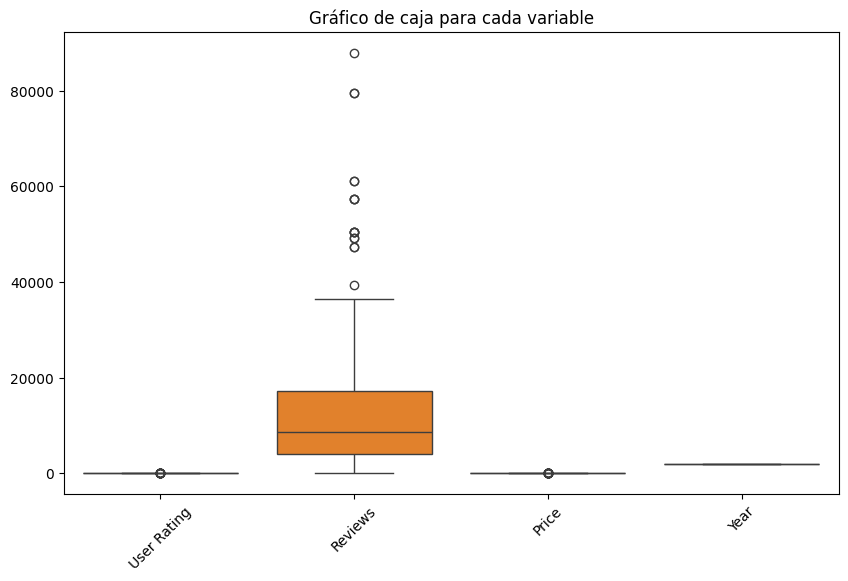

<ipython-input-5-6cc13e53b313>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


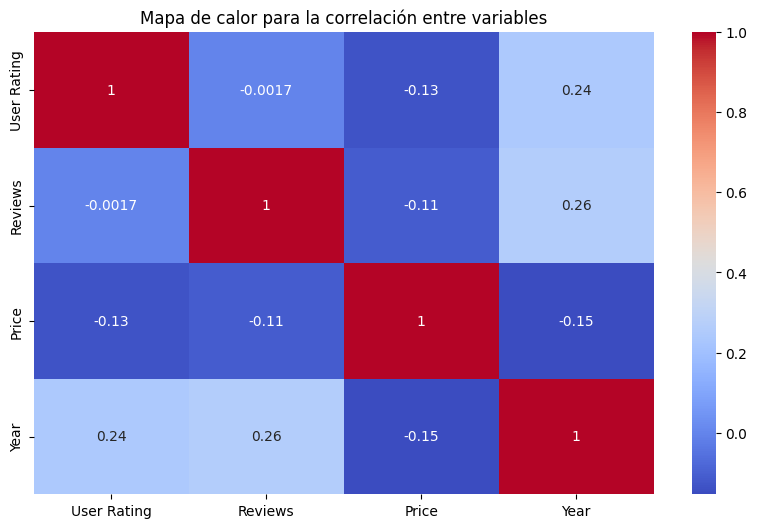

In [ ]:
# Análisis estadístico preliminar
print("Análisis estadístico:")
print(df.describe())

# Gráfico de caja (boxplot) para cada variable numérica
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Gráfico de caja para cada variable")
plt.xticks(rotation=45)
plt.show()

# Mapa de calor para la correlación entre las variables
correlation = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Mapa de calor para la correlación entre variables")
plt.show()

# Gráfico de dispersión para comparar dos variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='User Rating', y='Reviews', data=df)
plt.title("Gráfico de dispersión: User Rating vs Reviews")
plt.xlabel("User Rating")
plt.ylabel("Reviews")
plt.show()


In [ ]:
#1-Esto depende del análisis específico que estemos realizando. Sin embargo, las variables Name y Author pueden no aportar información relevante para ciertos análisis, como la correlación entre variables numéricas o la segmentación de datos.
#2- Podemos observar en el boxplot, valores extraños, ya que estan fuera del rango dado por reviews.
#3- Podemos observar que se parecen los rangos de las variables: User, price y year. Pero el que mas se diferencia es reviews y esto podría afectar el análisis, especialmente si estamos considerando la correlación entre variables.
#4- No se podemos dar la conclusión de que si hay grupos que se parecen, ya que no hemos utilizado los metodos adecuados, para poder decirlo con seguridad.
#conclusiones:


** Escribe tus conclusiones **                                       
1-Distribución y dispersión de los datos para cada variable.
2-Correlación entre las variables.
3-Relación entre dos variables específicas, como User Rating y Reviews.

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- ¿Cómo obtuviste el valor de $k$ a usar?
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- ¿Qué puedes decir de los datos basándose en los centros?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

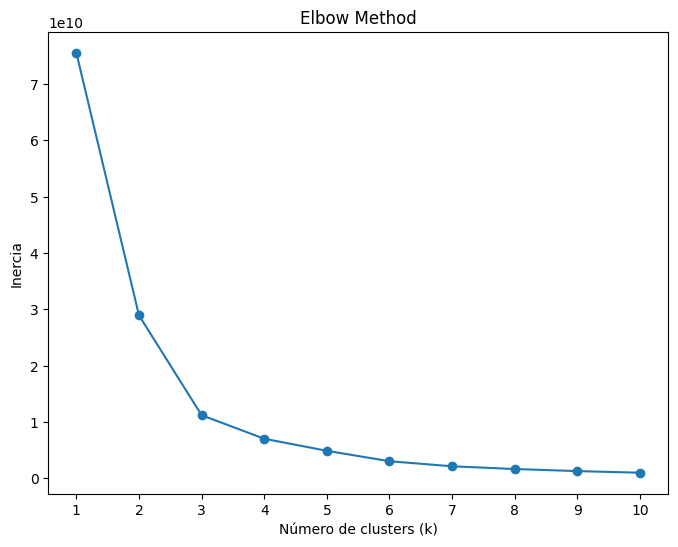

In [ ]:
# Implementa el algoritmo de kmeans y justifica la elección del número de
# clusters. Usa las variables numéricas.

X = df[['User Rating', 'Reviews', 'Price']]  # Variables numéricas

# Elegir un rango de valores de k para probar
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar la inercia en función de k
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.show()


In [ ]:
#1- Los centros pueden ser representativos de los datos, si el algoritmo de K-Means ha agrupado correctamente los puntos de datos similares en clusters. Sin embargo, esto depende de la calidad de los datos y de la elección adecuada de k
#2-Utilizamos el método del codo para seleccionar el valor de k. Buscamos el punto en la gráfica donde la curva comienza a aplanarse, lo que indica un cambio en la inercia.
#3- Un valor más alto de k puede conducir a clusters más específicos y detallados, pero también puede aumentar el riesgo de sobreajuste. Un valor más bajo de k puede conducir a clusters más generales, lo que nos daría valores generales.
#4- Los outliers pueden afectar significativamente la posición de los centros, ya que K-Means minimiza la suma de las distancias al cuadrado de cada punto al centroide de su cluster más cercano. Los outliers pueden atraer los centroides hacia ellos, lo que puede resultar en clusters menos representativos.
#5 -Los centroides representan el "centro" de cada cluster y pueden proporcionar información sobre las características típicas de los puntos de datos en cada cluster. Analizar los centroides puede ayudar a comprender mejor la estructura y la distribución de los datos.

Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

** Escribe la respuesta ** El grupo 1 tiene: un User Rating ligeramente superior a la media, con una cantidad moderada de reseñas y un precio medio. El grupo 2 tiene: un User Rating más bajo en comparación con los otros grupos, pero destaca por tener una cantidad significativamente alta de reseñas y un precio medio. Y el grupo 3 tiene: User Rating más alto de los tres, con una cantidad considerable de reseñas y un precio más bajo en comparación con los otros grupos. Al final quedarian así:                                   
Grupo 1: "Grupo de libros con calificaciones moderadas y precios medios"
Grupo 2: "Grupo de libros con muchas reseñas y precios medios"
Grupo 3: "Grupo de libros mejor calificados con precios más bajos"

In [ ]:
# Haz un análisis por grupo para determinar las características que los hace
# únicos. Ten en cuenta todas las variables numéricas.

# Elegir un valor de k
k = 3

# Aplicar K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Obtener los centroides
centroides = kmeans.cluster_centers_

# Crear un DataFrame con los centroides
centroides_df = pd.DataFrame(centroides, columns=X.columns)

# Mostrar las características de cada grupo
print("Características de cada grupo:")
for i, centroide in enumerate(centroides_df.iterrows(), 1):
    print(f"Grupo {i}:")
    print(centroide[1])  # centroide[1] es la fila de los centroides
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Características de cada grupo:
Grupo 1:
User Rating       4.604798
Reviews        6235.063131
Price            14.020202
Name: 0, dtype: float64

Grupo 2:
User Rating        4.4125
Reviews        58490.3750
Price             11.6875
Name: 1, dtype: float64

Grupo 3:
User Rating        4.681159
Reviews        22966.478261
Price             10.623188
Name: 2, dtype: float64



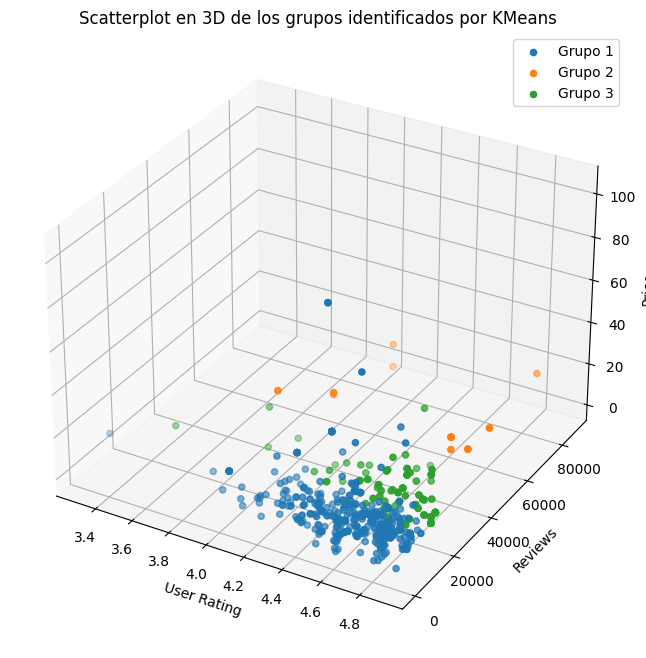

In [ ]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D
# (si es necesario). Analiza las características de cada grupo.


# Añadir una columna al DataFrame original con las etiquetas de los grupos
df['Cluster'] = kmeans.labels_

# Pairplot
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.title('Pairplot de los grupos identificados por KMeans')
plt.show()

# Scatterplot en 3D (si hay más de dos variables)
if len(X.columns) > 2:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for cluster in range(k):
        ax.scatter(X[df['Cluster'] == cluster]['User Rating'],
                   X[df['Cluster'] == cluster]['Reviews'],
                   X[df['Cluster'] == cluster]['Price'],
                   label=f'Grupo {cluster + 1}')
    ax.set_xlabel('User Rating')
    ax.set_ylabel('Reviews')
    ax.set_zlabel('Price')
    ax.set_title('Scatterplot en 3D de los grupos identificados por KMeans')
    ax.legend()
    plt.show()
